In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
%matplotlib notebook

In [2]:
# plt.style.use('seaborn')

### Data Preparation

In [3]:
mean_01 = np.array([1, 0.5])
cov_01 = np.array([[1,  0.1],[0.1, 1.4]])

mean_02 = np.array([3, 4.5])
cov_02 = np.array([[1.2,0.1],[0.1,1.3]])

dist_01 = np.random.multivariate_normal(mean_01, cov_01, 500)
dist_02 = np.random.multivariate_normal(mean_02, cov_02, 500)

In [4]:
print(dist_01.shape)

(500, 2)


In [5]:
total = dist_01.shape[0] + dist_02.shape[0]
data = np.zeros((total, 3))
data[:500, :-1] = dist_01 + np.random.randn(1, 2)
data[500:, :-1] = dist_02 + np.random.randn(1, 2)
data[:500, -1] = 1
np.random.shuffle(data)

### Normalizing the Data

In [6]:
u = np.mean(data[:, :-1], axis = 0)
sigma = np.std(data[:, :-1], axis = 0)
data[:, :-1] = (data[:,  :-1] - u)/sigma

In [7]:
ones = np.ones((data.shape[0], 1))

In [8]:
data = np.hstack((ones, data))

In [9]:
X = data[:, :-1]
Y = data[:, -1]

In [10]:
print(X.shape)

(1000, 3)


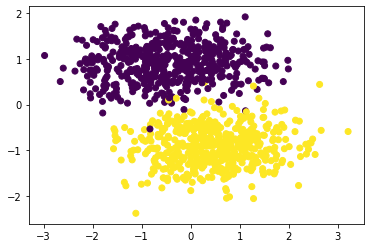

In [14]:
plt.scatter(X[:, 1], X[:, 2], c = data[:, 3]);

### Logistic Regression Function

In [79]:
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))

def hypothesis(x,theta):
    return sigmoid(np.dot(theta.T, x))


def error(X, Y, theta):
    m = X.shape[0]
    total_error = 0
    
    for i in range(m):
        y_hat = hypothesis(X[i], theta)
        total_error += (Y[i]*np.log2(y_hat) + (1 - Y[i])*np.log2(1 - y_hat))
    
    return -total_error/m  # average loss


def get_grad(X, Y, theta):
    
    grad = np.zeros(theta.shape)
    m = X.shape[0]
    
    for i in range(m):
        y_hat = hypothesis(X[i],theta)
        x = X[i].reshape((-1,1))
        grad += (Y[i] - y_hat)*x
    return grad/m


def grad_descent(X,Y,learning_rate=0.5):
    theta = np.zeros((X.shape[1],1))
    
    error_list = []
    
    for i in range(100):
        theta = theta + learning_rate*get_grad(X, Y, theta)
        e = error(X, Y, theta)
        error_list.append(e)
        
    return theta,error_list

In [80]:
theta, error_list =  grad_descent(X, Y)

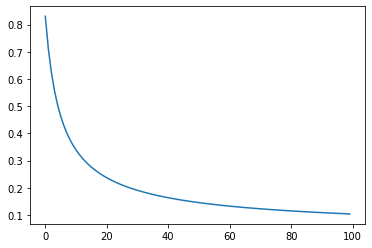

In [81]:
plt.plot(error_list);

In [73]:
test = np.reshape(X[23], (-1, 1))

In [74]:
np.dot(theta.T, test)

array([[8.1295839]])

In [76]:
Y[23]

1.0

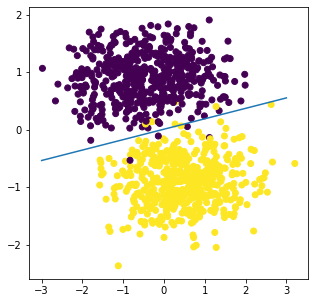

In [78]:
def drawLine():
    plt.figure(figsize=(5,5))
    x = np.linspace(-3,3,10)
    y = -(theta[0,0]*1 + theta[1,0]*x)/theta[2,0]
    plt.scatter(X[:,1],X[:,2],c=Y)
    
    plt.plot(x,y)
    
drawLine()